# IFT 6135 - W2019 - Assignment 1
## Question 1 - Multilayer Perceptron for MNIST
__Assignment Instructions:__ https://www.overleaf.com/read/msxwmbbvfxrd  
__Github Repository:__ https://github.com/stefanwapnick/IFT6135PracticalAssignments  
__Developed in Python 3__

__Team Members__
- Mohamed Amine (UdeM ID: 20150893)
- Oussema Keskes (UdeM ID: 20145195)
- Stephan Tran (UdeM ID: 20145195)
- Stefan Wapnick (UdeM ID: 20143021)

In [2]:
from activations import Sigmoid, Tanh, Relu
from models import NN, NNFactory
from data import load_mnist, ResultsCache
from weight_initialization import Normal, Glorot, Zeros
from visualization import plot_gradient_difference, plot_training_stats
import numpy as np

# Part 1 - Building the Model

### Methodology
A standard feed-forward neural network (multilayer perceptron) was implemented using numpy and applied to the MNIST handwritten digit dataset. This dataset consists of __10 classes__ (digits) and __28x28 image inputs__ (or equivalently a 784 1d vector). The implementation can be found in ```models.py```.  
Loss is implemented as __multi-class cross entropy__ and optimized with __stochasctic gradient descent__.  



The dimensionality of the hidden layers, weight initialization, activation function (with the exception of the last layer being softmax), learning rate, and mini-batch size are parameterized.

__Training - Forward Pass__

The forward pass is computed by calculating the pre and post-activation functions at each layer:


where the activation function of the final output layer is taken to be the softmax function.


__Training - Back Propegation__

Backward propegation is done by calculating gradient quantities iteratively for each layer:


The weights and bias terms are then adjusted: 




### Sample Training Results
The code block below shows sample results which plot the loss and accuracy over number of epochs during training. __Tanh__ activation function and __Normal__ distribution weight initialization are used.


TRAINING: g=Tanh, w_init=Normal, layers=784-512-256-10, α=0.10, batch=128
Epoch 1: TrainLoss=2.127284, TrainAcc=0.774920, ValidLoss=2.196374, ValidAcc=0.776200
Epoch 2: TrainLoss=1.384241, TrainAcc=0.827500, ValidLoss=1.565976, ValidAcc=0.820300
Epoch 3: TrainLoss=1.012352, TrainAcc=0.859640, ValidLoss=1.294797, ValidAcc=0.843700
Epoch 4: TrainLoss=0.778200, TrainAcc=0.883020, ValidLoss=1.135239, ValidAcc=0.857700
Epoch 5: TrainLoss=0.605040, TrainAcc=0.899940, ValidLoss=1.053738, ValidAcc=0.865000
Epoch 6: TrainLoss=0.445588, TrainAcc=0.917500, ValidLoss=0.976493, ValidAcc=0.869200
Epoch 7: TrainLoss=0.354145, TrainAcc=0.928520, ValidLoss=0.959031, ValidAcc=0.868600
Epoch 8: TrainLoss=0.258702, TrainAcc=0.946020, ValidLoss=0.910475, ValidAcc=0.874300
Epoch 9: TrainLoss=0.193244, TrainAcc=0.958900, ValidLoss=0.903415, ValidAcc=0.874700
Epoch 10: TrainLoss=0.150637, TrainAcc=0.967840, ValidLoss=0.878393, ValidAcc=0.878500
DONE after 99s: g=Tanh, w_init=Normal, layers=784-512-256-10, α=

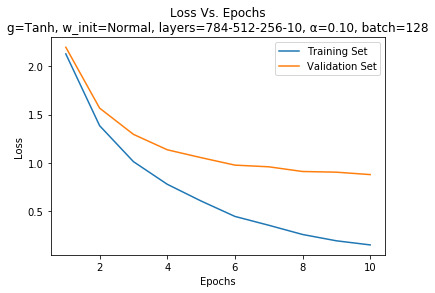

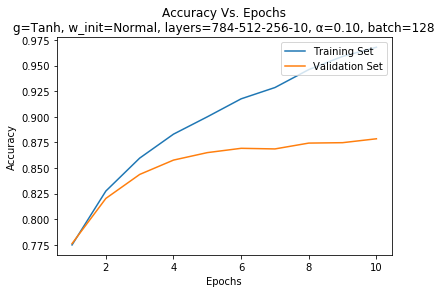

In [4]:
%matplotlib inline
train_set, valid_set, _ = load_mnist()
nn = NNFactory.create(hidden_dims=[512, 256], activation=Tanh, weight_init=Normal)
stats = nn.train(train_set, valid_set, alpha=0.1, batch_size=128)
plot_training_stats(stats, plot_title=nn.training_info_label, plot_acc=True)

### Analysis
Typical loss and accuracy versus epochs curves are obtained. For these sets of parameters, validation accuracy and loss begin to plateau after 10 epochs while training results continue to improve, indicating the start of some overfitting.  
The validation accuracy is not very high in this instance however with the correct set of hyper-parameters >97% accuracy can be obtained (see part 3).

# Part 2 - Weight Initialization

### Methodology

This section examines the effects of different weight initialization schemes:

* __Zeros__: All weights are initialized to 0
* __Normal__: Initialized from a standard normal distribution $\mathscr{N}(w_{ij}^{l}; 0, 1)$ (mean=0, variance=1)
* __Glorot__: Initialized from a uniform distribution $\mathscr{U}(w_{ij}^{l}; -d^{l}, d^{l})$ where $d^l=\sqrt{\frac{6}{h^{l-1} + h^{l}}}$ ($h^l$ denotes the number dimension of layer l)

### Results
The following code block plots the loss versus training epochs for the different weight schemes: Zeros, Normal, Glorot


TRAINING: g=Sigmoid, w_init=Zeros, layers=784-512-256-10, α=0.10, batch=256
Epoch 1: TrainLoss=2.337794, TrainAcc=0.098640, ValidLoss=2.335217, ValidAcc=0.099100
Epoch 2: TrainLoss=2.306142, TrainAcc=0.103500, ValidLoss=2.305279, ValidAcc=0.109000
Epoch 3: TrainLoss=2.313480, TrainAcc=0.099020, ValidLoss=2.313204, ValidAcc=0.096700
Epoch 4: TrainLoss=2.316895, TrainAcc=0.113560, ValidLoss=2.318640, ValidAcc=0.106400
Epoch 5: TrainLoss=2.311022, TrainAcc=0.102020, ValidLoss=2.311380, ValidAcc=0.103000
Epoch 6: TrainLoss=2.313465, TrainAcc=0.099760, ValidLoss=2.315412, ValidAcc=0.096100
Epoch 7: TrainLoss=2.312609, TrainAcc=0.099760, ValidLoss=2.315774, ValidAcc=0.096100
Epoch 8: TrainLoss=2.311059, TrainAcc=0.099760, ValidLoss=2.310917, ValidAcc=0.096100
Epoch 9: TrainLoss=2.313262, TrainAcc=0.113560, ValidLoss=2.315789, ValidAcc=0.106400
Epoch 10: TrainLoss=2.309388, TrainAcc=0.113560, ValidLoss=2.311756, ValidAcc=0.106400
DONE after 83s: g=Sigmoid, w_init=Zeros, layers=784-512-256-10

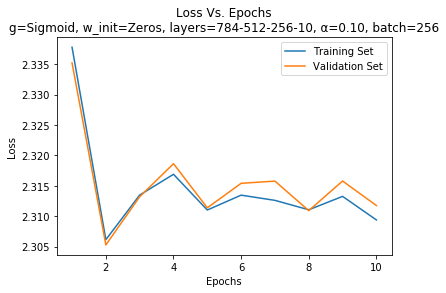


TRAINING: g=Sigmoid, w_init=Normal, layers=784-512-256-10, α=0.10, batch=256
Epoch 1: TrainLoss=1.655491, TrainAcc=0.623220, ValidLoss=1.576994, ValidAcc=0.639200
Epoch 2: TrainLoss=1.157830, TrainAcc=0.713100, ValidLoss=1.119534, ValidAcc=0.724600
Epoch 3: TrainLoss=0.909710, TrainAcc=0.765840, ValidLoss=0.891969, ValidAcc=0.769500
Epoch 4: TrainLoss=0.781428, TrainAcc=0.792120, ValidLoss=0.778922, ValidAcc=0.794500
Epoch 5: TrainLoss=0.707129, TrainAcc=0.810680, ValidLoss=0.723576, ValidAcc=0.808000
Epoch 6: TrainLoss=0.630673, TrainAcc=0.827460, ValidLoss=0.655415, ValidAcc=0.822600
Epoch 7: TrainLoss=0.582187, TrainAcc=0.838380, ValidLoss=0.622224, ValidAcc=0.831900
Epoch 8: TrainLoss=0.541821, TrainAcc=0.848360, ValidLoss=0.589698, ValidAcc=0.839700
Epoch 9: TrainLoss=0.507923, TrainAcc=0.857280, ValidLoss=0.560104, ValidAcc=0.846100
Epoch 10: TrainLoss=0.479925, TrainAcc=0.864280, ValidLoss=0.538935, ValidAcc=0.851200
DONE after 83s: g=Sigmoid, w_init=Normal, layers=784-512-256-

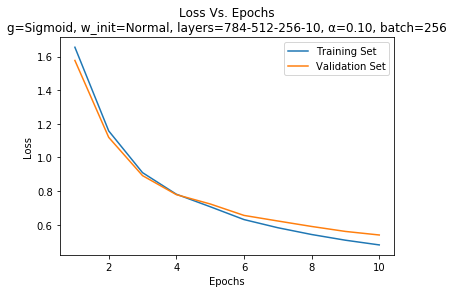


TRAINING: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=256
Epoch 1: TrainLoss=1.829079, TrainAcc=0.484820, ValidLoss=1.822579, ValidAcc=0.499300
Epoch 2: TrainLoss=1.005384, TrainAcc=0.743600, ValidLoss=0.967466, ValidAcc=0.765000
Epoch 3: TrainLoss=0.660813, TrainAcc=0.834420, ValidLoss=0.620112, ValidAcc=0.851500
Epoch 4: TrainLoss=0.537883, TrainAcc=0.859000, ValidLoss=0.499165, ValidAcc=0.871000
Epoch 5: TrainLoss=0.474474, TrainAcc=0.869500, ValidLoss=0.437632, ValidAcc=0.882400
Epoch 6: TrainLoss=0.425391, TrainAcc=0.883860, ValidLoss=0.390326, ValidAcc=0.895400
Epoch 7: TrainLoss=0.395646, TrainAcc=0.888840, ValidLoss=0.363747, ValidAcc=0.899100
Epoch 8: TrainLoss=0.388785, TrainAcc=0.889940, ValidLoss=0.359251, ValidAcc=0.898500
Epoch 9: TrainLoss=0.373719, TrainAcc=0.890480, ValidLoss=0.344760, ValidAcc=0.900900
Epoch 10: TrainLoss=0.354258, TrainAcc=0.897560, ValidLoss=0.327695, ValidAcc=0.906700
DONE after 83s: g=Sigmoid, w_init=Glorot, layers=784-512-256-

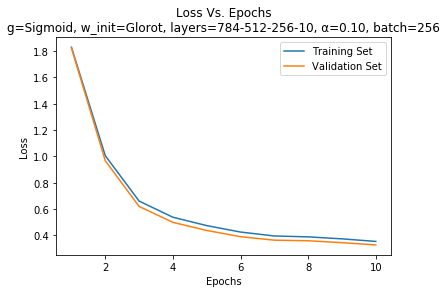

In [5]:
%matplotlib inline
train_set, valid_set, _ = load_mnist()
weight_inits = [Zeros, Normal, Glorot]

for weight_init in weight_inits:
    nn = NNFactory.create(hidden_dims=[512, 256], activation=Sigmoid, weight_init=weight_init)
    stats = nn.train(train_set, valid_set, alpha=0.1, batch_size=256)
    plot_training_stats(stats, plot_title=nn.training_info_label)

### Analysis  
__Glorot__ weight initialization appears to produce the best results.
Ideal weight initialization should give small values (such that activations functions are not saturated) with evenly spread values to encourage diverse development of weights during training.
* __Zeros__: Results in little change because no gradient can be propegated backwards. Biases are still adjusted somewhat however this is a negligible improvement.
* __Normal__: Gives moderate results. However a normal distribution may not be ideal for encouraging event spread of weights. Likewise, it is common to scale weights initialized as some function of the layer dimensions such as is done with the scaling factor in Glorot weight initialization:  $d^l=\sqrt{\frac{6}{h^{l-1} + h^{l}}}$. In this case, no such scaling is done and thus the values sampled by the Normal distribution may be too large.
* __Glorot__: Yields best results: faster and descent and lowest value of schmes tested after 10 epochs.

# Part 3 - Hyperparameter Search

### Methodology
In his section, the effect of different hyper-parameters on the performance of the model is explored. Hyper-parameters are tuned on the validation set to select the model that appears to generalize the best. The following parameters are tested: 

| Parameter | Value   |
|------|------|
|   learning rate  | 0.1, 0.01|
|   batch size  | 128, 256|
|   hidden layer dimensions  | (512, 256), (256, 512), (784, 256)|
|   activation functions  | sigmoid, tanh, relu|

### Results
The code block summarizes the results for how the validation accuracy changes for different hyper-parameters.

In [6]:
%matplotlib inline

activations = [Sigmoid, Tanh, Relu]
alphas = [0.1, 0.01]
batch_sizes = [128, 256]
hidden_layers = [[512, 256], [512, 512], [784, 256]]
weight_inits = [Glorot]

train_set, valid_set, _ = load_mnist()
results_cache = ResultsCache.load()
params = [(g, h, a, b, w)
          for g in activations for a in alphas for b in batch_sizes
          for h in hidden_layers for w in weight_inits]

for (g, h, a, b, w) in params:
    nn = NNFactory.create(h, activation=g, weight_init=w)
    _, _, _, valid_acc = nn.train(train_set, valid_set, alpha=a, batch_size=b, verbose=False)
    results_cache.insert(nn, a, b, valid_acc[-1])
results_cache.display()


DONE after 92s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=128 - ValidLoss=0.278098, ValidAcc=0.919700
DONE after 116s: g=Sigmoid, w_init=Glorot, layers=784-512-512-10, α=0.10, batch=128 - ValidLoss=0.283246, ValidAcc=0.918200
DONE after 133s: g=Sigmoid, w_init=Glorot, layers=784-784-256-10, α=0.10, batch=128 - ValidLoss=0.282192, ValidAcc=0.918700
DONE after 88s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=256 - ValidLoss=0.327695, ValidAcc=0.906700
DONE after 122s: g=Sigmoid, w_init=Glorot, layers=784-512-512-10, α=0.10, batch=256 - ValidLoss=0.337635, ValidAcc=0.902600
DONE after 127s: g=Sigmoid, w_init=Glorot, layers=784-784-256-10, α=0.10, batch=256 - ValidLoss=0.330133, ValidAcc=0.905900
DONE after 96s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.01, batch=128 - ValidLoss=0.932925, ValidAcc=0.808900
DONE after 120s: g=Sigmoid, w_init=Glorot, layers=784-512-512-10, α=0.01, batch=128 - ValidLoss=0.912678, ValidAcc=0.789400
DONE after 

### Analysis
Results are ordered by descending value of validation accuracy. The model achieving the highest validation accuracy ($ \approx 98 \%$) was: learning rate = 0.1, batch_size = 128, hidden_layers = (512, 512), activation function = relu however other models possess only fractionally worse results.

__Activation Function__:

__Layer Dimensions__:

__Learning Rate__:

__Batch Size__:

# Part 4 - Validate Gradients using Finite Difference

### Methodology
Gradient computations are validated using the central finite difference approximation of the derivative (Taylor series expanded to 1st order derivative):  
$$ \partial L/\partial w_{ij}^{(l)} \approx \frac{L(w_{ij}^{(l)}+\epsilon) - L(w_{ij}^{(l)}-\epsilon)}{2\epsilon} $$

In summary, the value of a weight $w_{ij}^{(l)}$ is manually offset by $+/-\epsilon$ and the new loss is recorded after which the central finite different equation is used to estimate the gradient of the loss to this weight. This estimate will be compared with the value returned from the neural network during back-propegation. If the implementation of the neural network is working as intended these two quantities should be close.

The first 10 weights of the second layer of the network are inspected for different values of N:

$$ N = [1, 10, 100, 1000, 10000] \qquad \epsilon = 1/N $$

For each N value, the maximum difference of the 10 inspected weights is calculated and plotted: 

$$ max_{1<i<p}|\nabla_{i}^{N}-\partial L/\partial \theta_i | $$

### Results


TRAINING: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=128
Epoch 1: TrainLoss=1.004191, TrainAcc=0.712860, ValidLoss=0.972711, ValidAcc=0.738800
Epoch 2: TrainLoss=0.541155, TrainAcc=0.854620, ValidLoss=0.500941, ValidAcc=0.870300
Epoch 3: TrainLoss=0.423884, TrainAcc=0.883640, ValidLoss=0.390488, ValidAcc=0.893500
Epoch 4: TrainLoss=0.381097, TrainAcc=0.891480, ValidLoss=0.352300, ValidAcc=0.899600
Epoch 5: TrainLoss=0.358063, TrainAcc=0.897500, ValidLoss=0.330352, ValidAcc=0.905000
Epoch 6: TrainLoss=0.338225, TrainAcc=0.902380, ValidLoss=0.311613, ValidAcc=0.911200
Epoch 7: TrainLoss=0.319275, TrainAcc=0.907560, ValidLoss=0.295628, ValidAcc=0.915500
Epoch 8: TrainLoss=0.316658, TrainAcc=0.909120, ValidLoss=0.294879, ValidAcc=0.914000
Epoch 9: TrainLoss=0.313108, TrainAcc=0.907100, ValidLoss=0.291814, ValidAcc=0.912900
Epoch 10: TrainLoss=0.297042, TrainAcc=0.912740, ValidLoss=0.278098, ValidAcc=0.919700
DONE after 89s: g=Sigmoid, w_init=Glorot, layers=784-512-256-

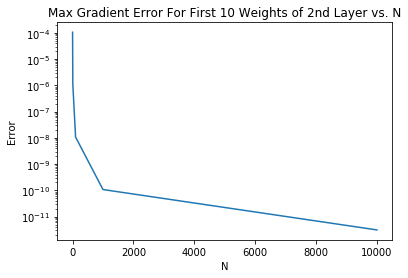

In [7]:
%matplotlib inline
layer = 2
M = 10
N = 10. ** (np.arange(5))
epsilons = np.reciprocal(N)
error = np.zeros(len(epsilons))

(x_train, y_train), valid_set, _ = load_mnist()
nn = NNFactory.create(hidden_dims=[512, 256], activation=Sigmoid, weight_init=Glorot)
nn.train((x_train, y_train), valid_set)

# Take 1 training sample to use when comparing gradient calculations
x_sample = x_train[:, 0].reshape((-1, 1))
y_sample = y_train[:, 0].reshape((-1, 1))

# For the first 10 weights of the 2nd layer, calculate the max error
for i_eps, eps in enumerate(epsilons):
    for idx in range(M):
        # weight idx = layer #, neuron #, weight # for neuron
        # Inspect 10 first weights of 2nd layer, 1st neuron
        weight_idx = (layer, 0, idx)
        gradient_error = nn.estimate_finite_diff_gradient(x_sample, y_sample, eps, weight_idx)
        error[i_eps] = max(error[i_eps], gradient_error)
plot_gradient_difference(N, error)

### Analysis
Errors are plotted on a semi-log scale. The gradients computed during back-propegation and those estimated by the central finite difference approximation are a close match. Note that at lower values of N there is more error however this is to be expected since the the finite difference approximation is less accurate for larger values of $\epsilon$ (larger N). As $\epsilon$ decreases (N increases) the finite difference approximation becomes more accurate and the error was found to decrease.